In [1]:
import xarray as xr
from pyproj import Proj
from dask.diagnostics import ProgressBar
import numpy as np

# Do a first selection of 4000 points from the high resolution 

In [ ]:
rng = np.random.default_rng()
rints_x = rng.integers(low=0, high=7813, size=200)
rints_y = rng.integers(low=0, high=8074, size=200)

In [ ]:
path = '/data/AIDL-UPC/prcp/used/'

file = 'daymet_v4_daily_na_prcp_'

In [ ]:
iyear = 2000
data = xr.open_dataset(path + file + str(iyear) + '.nc')

In [ ]:
for iyear in range(2001, 2021):
    data = xr.open_dataset(path + file + str(iyear) + '.nc' , chunks = {'x': -1, 'y': -1})
    data_short = data.isel(x = rints_x, y = rints_y)
    with ProgressBar():
        data_short.to_netcdf(path + 'short/'+ file + str(iyear) + '_sel200.nc')
    print(path + 'short/'+ file + str(iyear) + '.nc')
        

# Select the data with no nans

In [ ]:
# select lat y lons from the points of interest that not are nan
path  = '/data/AIDL-UPC/daymet_v4_daily/prcp/used/short/'
file = 'daymet_v4_daily_na_prcp_2001_sel200.nc'

data = xr.open_dataset(path + file )
c = data.prcp.values
c = np.mean(c,  0)
lats_nonan =data.lat.values[~np.isnan(c)]
lons_nonan =data.lon.values[~np.isnan(c)]

c = np.where((lons_nonan<-45) & (lons_nonan>-165))
latitudes = lats_nonan[c]
longitudes = lons_nonan[c]




In [ ]:
ds_out = xr.Dataset(
            {
                "lat": (["lat"], latitudes),
                "lon": (["lon"], longitudes),
            }
        )

In [ ]:
ds_out.to_netcdf('/data/AIDL-UPC/prcp/used/short/daymet_v4_daily_na_prcp_sel200_latlon_nonan.nc')

# Plot the available points in the Utah-NEvada region

In [30]:
import xarray as xr
from pyproj import Proj
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy
rivers = cartopy.feature.NaturalEarthFeature(
    category='physical', name='rivers_lake_centerlines',
    scale='10m', facecolor='none', edgecolor='blue')
land_50m = cartopy.feature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='face',
                                        facecolor=cartopy.feature.COLORS['land'])

states = cartopy.feature.STATES

In [4]:
points = xr.open_dataset('/data/AIDL-UPC/daymet_v4_daily/prcp/used/short/daymet_v4_daily_na_prcp_sel200_latlon_nonan.nc')

In [17]:
c = xr.where((points.lat>37)&(points.lat<43),points.lat, 0 ).values
d = xr.where((points.lon>-120)&(points.lon<-110),points.lon, 0 ).values
f = np.where(c*d!=0)

In [22]:
lats = points.lat.values[f]
lons = points.lon.values[f]

In [47]:
npoints = 50
rng = np.random.default_rng()
points = rng.integers(low=0, high=lons.shape, size=npoints)


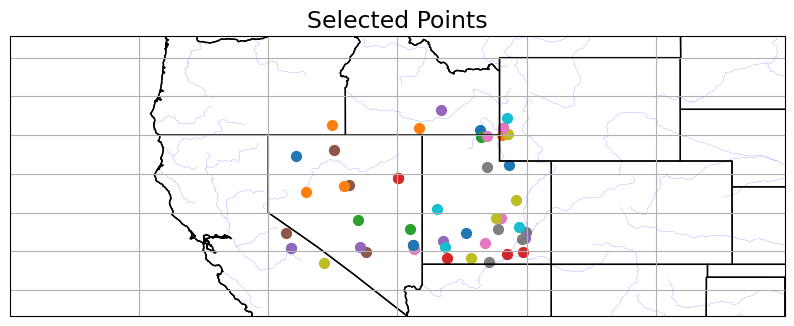

In [48]:
fig, axes = plt.subplots(ncols=1,nrows = 1, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(10,10))
axes.set_title('Selected Points', fontsize = 17 )   

#points = np.arange(10)
for ipoint in points:
    axes.scatter(lons[ipoint], lats[ipoint], s = 50)
#for ipoint in range(lons.shape[0]):
#    axes.scatter(lons[ipoint], lats[ipoint], s = 50)
    #axes.annotate(str(ipoint+1), (lons[ipoint], lats[ipoint]), fontsize = 10)

axes.set_extent([-130, -100, 35, 45])    
# add rivers
axes.add_feature(rivers, linewidth=0.1)
# add coastlines
axes.coastlines()
axes.gridlines()
axes.add_feature(states)
# add country limits
axes.add_feature(cartopy.feature.BORDERS)

#plt.tight_layout()
plt.show()
#fig.savefig('/home/vestella/Figs/Banjul/Banjul_ExtTemp.png')

In [49]:
ds_out = xr.Dataset(
            {
                "lat": (["lat"],lats[points]),
                "lon": (["lon"],  lons[points]),
            }
        )

In [52]:
ds_out.to_netcdf('/data/AIDL-UPC/daymet_v4_daily/prcp/used/short/daymet_v4_daily_na_prcp_sel50_latlon_Nevada_Utah.nc')